# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, requests, time
from scipy.stats import linregress

# Import API key
from config import api_key

# Import citipy to generate city names from randomly generated coordinates
from citipy import citipy

# CSV export path
output_data_file = "output_data/cities.csv"

# Ranges for latitude and longitude generator
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating random cities

In [2]:
# List for storing coordinates and city names
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

## Calling OpenWeather API using random cities list


In [3]:
# Constructing base query url for OpenWeather API
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='

# List to populate with weather values
weather_list = []

# Looping through citipy generated cities as OpenWeather API parameters
for i in cities:
    response = requests.get(base_url + i).json()
    try:
        weather_list.append([response['name'], response['sys']['country'], response['coord']['lat'], response['coord']['lon'],
                           response['main']['temp_max'], response['main']['humidity'], response['wind']['speed'],
                           response['clouds']['all'], (response['dt']+response['timezone'])])
        print(f"Checking city #{cities.index(i) + 1}: {i.title()}, {response['sys']['country']}")
    except:
        print("City not found. Next city...")

City not found. Next city...
Checking city #2: Bulgan, MN
City not found. Next city...
Checking city #4: Castro, BR
Checking city #5: Vaini, TO
City not found. Next city...
Checking city #7: Kruisfontein, ZA
Checking city #8: Mali, GN
Checking city #9: Kahului, US
Checking city #10: Ushuaia, AR
Checking city #11: Fort Morgan, US
Checking city #12: Bengkulu, ID
Checking city #13: Atuona, PF
Checking city #14: Majene, ID
Checking city #15: Dandong, CN
Checking city #16: Hithadhoo, MV
Checking city #17: Cape Town, ZA
Checking city #18: Esperance, AU
Checking city #19: Grootfontein, NA
Checking city #20: Arraial Do Cabo, BR
Checking city #21: Havoysund, NO
Checking city #22: Bredasdorp, ZA
Checking city #23: Punta Arenas, CL
Checking city #24: Kavieng, PG
Checking city #25: Wanning, CN
Checking city #26: Mahebourg, MU
Checking city #27: Henties Bay, NA
City not found. Next city...
Checking city #29: Constitucion, CL
Checking city #30: Ribeira Grande, PT
City not found. Next city...
Checkin

Checking city #252: Gracanica, BA
Checking city #253: Bayan, CN
Checking city #254: Yulara, AU
Checking city #255: Sulangan, PH
Checking city #256: Neuquen, AR
Checking city #257: Tura, IN
Checking city #258: Poykovskiy, RU
Checking city #259: Kaka, TM
Checking city #260: Port Lincoln, AU
Checking city #261: Superior, US
City not found. Next city...
Checking city #263: Mayumba, GA
Checking city #264: El Fuerte, MX
City not found. Next city...
Checking city #266: Mastic Beach, US
Checking city #267: Hearst, CA
Checking city #268: Pishin, PK
Checking city #269: Karpathos, GR
Checking city #270: Wilmington, US
Checking city #271: Saint Marys, US
City not found. Next city...
Checking city #273: Rorvik, NO
City not found. Next city...
Checking city #275: Riohacha, CO
Checking city #276: Rocha, UY
Checking city #277: Kidal, ML
Checking city #278: Shache, CN
Checking city #279: Rio Grande, BR
Checking city #280: Pavlovsk, RU
Checking city #281: Georgetown, MY
Checking city #282: Ambilobe, MG


Checking city #502: Lahat, ID
Checking city #503: Maarianhamina, AX
Checking city #504: Pastavy, BY
Checking city #505: Jiexiu, CN
Checking city #506: Shakawe, BW
Checking city #507: Kjopsvik, NO
Checking city #508: Alaca, TR
Checking city #509: Maple Creek, CA
Checking city #510: Rapid Valley, US
Checking city #511: Pascagoula, US
Checking city #512: Chaupal, IN
Checking city #513: Turayf, SA
Checking city #514: Muros, ES
Checking city #515: Shaoguan, CN
Checking city #516: Hasaki, JP
Checking city #517: Eyl, SO
Checking city #518: La Ronge, CA
Checking city #519: Kandalaksha, RU
Checking city #520: Vanavara, RU
Checking city #521: Eydhafushi, MV
Checking city #522: Byron Bay, AU
Checking city #523: Ewa Beach, US
Checking city #524: Ucluelet, CA
Checking city #525: Nuuk, GL
Checking city #526: Aksarka, RU
Checking city #527: Novi Pazar, RS
Checking city #528: Same, TZ
Checking city #529: Garden City, US
Checking city #530: Jiayuguan, CN
Checking city #531: Lunglei, IN
Checking city #5

## Weather dataframe and output

In [4]:
# Converting weather data list to dataframe
weather_df = pd.DataFrame(weather_list, columns=['City', 'Country', 'Latitude', 'Longitude', 'Max Temp (F)', 
                                                 'Humidity %', 'Wind (mph)', 'Cloudiness %', 'Time'])
# Converting unix timestamps to readable date/time
weather_df['Time'] = pd.to_datetime(weather_df['Time'],unit='s')

# Separating datetime object into separate columns
weather_df['Date'] = [str(i).split(' ')[0] for i in weather_df['Time']]
weather_df['Time'] = [str(i).split(' ')[1] for i in weather_df['Time']]

In [5]:
# Output of weather dataframe for VacationPy exercise
weather_df.to_csv(output_data_file)

In [6]:
weather_df.head(100)

,City,Country,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %,Time,Date
0,Bulgan,MN,48.81,103.53,63.68,82,5.68,99,11:23:49,2020-08-05
1,Castro,BR,-24.79,-50.01,50.31,93,4.59,0,00:23:50,2020-08-05
2,Vaini,TO,-21.20,-175.20,75.20,69,6.93,20,16:23:50,2020-08-05
3,Kruisfontein,ZA,-34.00,24.73,48.99,82,2.48,100,05:23:50,2020-08-05
4,Mali,GN,12.08,-12.30,58.87,100,3.06,100,03:23:50,2020-08-05
...,...,...,...,...,...,...,...,...,...,...
95,São Filipe,CV,14.90,-24.50,75.97,80,5.30,61,02:24:12,2020-08-05
96,Grand Gaube,MU,-20.01,57.66,63.00,83,5.99,84,07:24:12,2020-08-05
97,Yar-Sale,RU,66.83,70.83,64.17,56,10.56,0,08:24:12,2020-08-05
98,Crawfordsville,US,40.04,-86.87,60.01,100,4.74,1,23:24:12,2020-08-04


## Comparing latitude values across different weather dimensions

In [8]:
# Creating date variable for scatterplot titles
date = weather_df.iloc[0,9]

# Creating scatterplot builder function
def scatter_builder(x_axis, y_axis):
    # Plot size
    plt.figure(figsize=(12,8))
    # Plot constructor
    weather_scatter = plt.scatter(weather_df[x_axis], weather_df[y_axis], edgecolors='black')
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on {date}')
    # Save output chart as .png
    path = f'output_data/{x_axis[0]}_{y_axis[0]}_scatter.png'
    plt.savefig(path, format='png')
    # Plot display
    plt.show()

### Latitude vs. Max Temperature

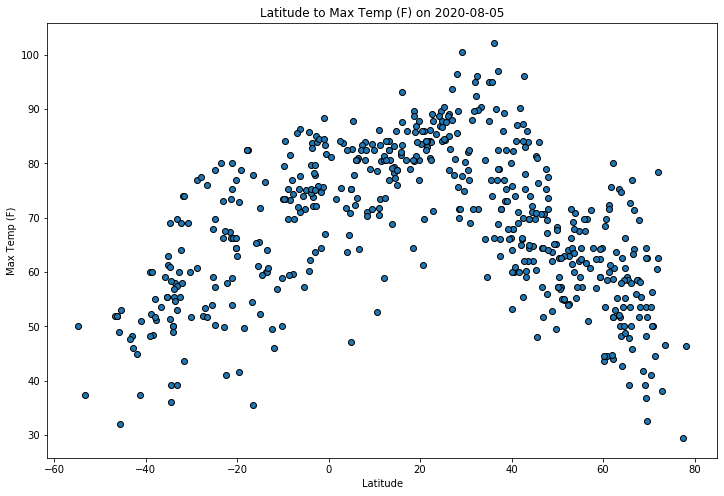

In [9]:
scatter_builder('Latitude', 'Max Temp (F)')

Plotting changes in max daily temperature across all latitudinal values. We see that temperature trends higher the closer the latitude is to 0, increasing from negative latitude values and decreasing as we go over zero.

### Latitude vs. Humidity

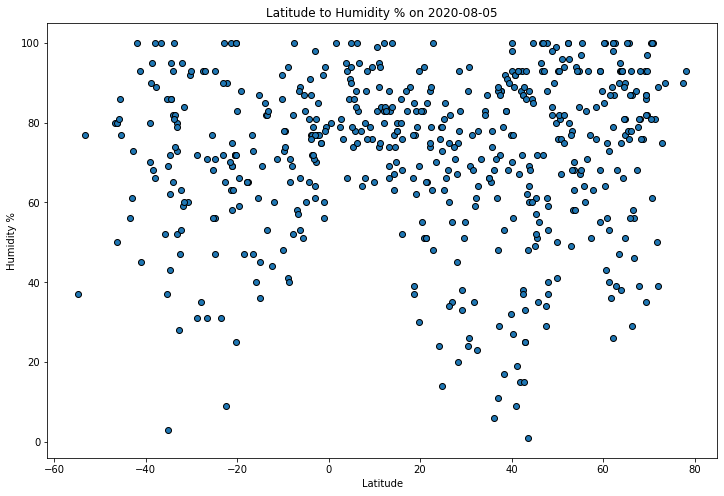

In [10]:
scatter_builder('Latitude', 'Humidity %')

Plotting changes in humidity saturation across all latitudinal values. The extremes and near-0 latitudes trend towards higher humidity values, while middle latitudes show lower cluster values.

### Latitude vs. Cloudiness

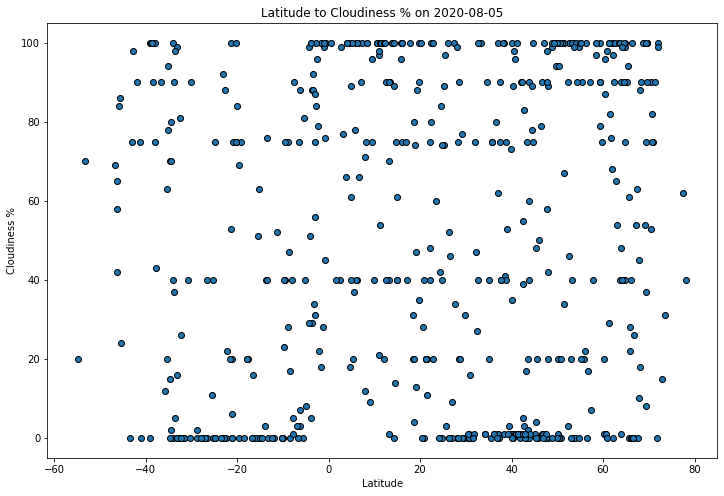

In [11]:
scatter_builder('Latitude', 'Cloudiness %')

Plotting changes in cloud cover across all latitudinal values. Cloud cover is distributed starkly across most latitudinal values, with tight cloudless clusters in the middle latitudes and high amounts of cloud cover in the extreme and 0-10 latitudes.

### Latitude vs. Wind Speed

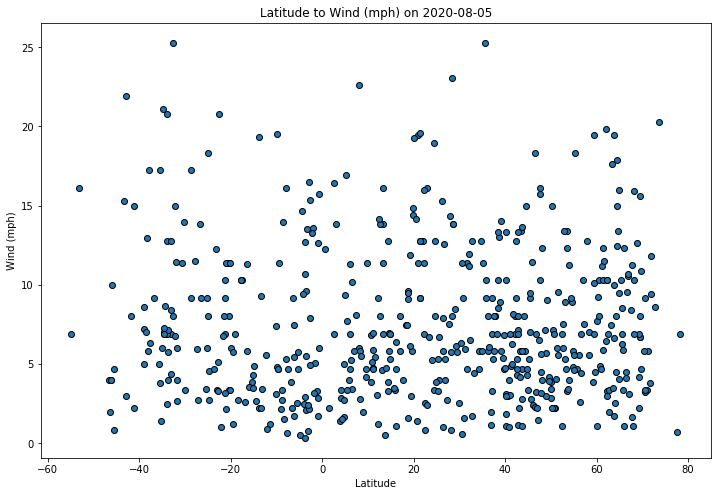

In [12]:
scatter_builder('Latitude', 'Wind (mph)')

Plotting changes in wind speed in miles per hour across all latitudinal values. Wind speeds appear to show nearly no correlation with latitude.

## Linear Regression

In [13]:
# Creating linear regression function
def regression_plotter(hemisphere, x_axis, y_axis):
    # Storing column references into variables
    x = hemisphere[x_axis]
    y = hemisphere[y_axis]
    # Building scatterplot
    plt.figure(figsize=(12,8))
    plt.scatter(x, y, edgecolors='black')
    # Extracting and plotting regression variables
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, regress_values, "r-", alpha=.75)
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on {date}')
    plt.annotate(line_eq, (x.min() + 5, y.min() + 10), fontsize=14,color="red")
    print(f'The r-squared value is {rvalue**2}')
    if hemisphere.iloc[1, 2] > 0:
        path = f'output_data/northern_{x_axis[0]}_{y_axis[0]}_regression.png'
    else:
        path = f'output_data/southern_{x_axis[0]}_{y_axis[0]}_regression.png'
    plt.savefig(path, format='png')
    plt.show()

In [14]:
# Creating Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df['Latitude'] > 0, :]
southern = weather_df.loc[weather_df['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.4464744481750758


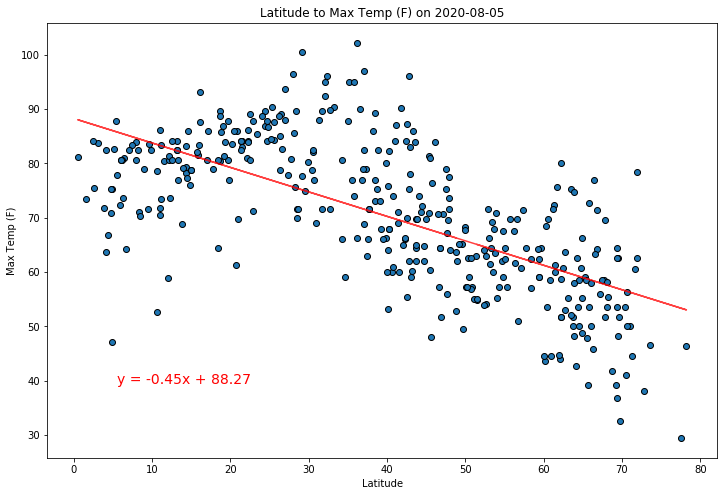

In [15]:
regression_plotter(northern, 'Latitude', 'Max Temp (F)')

Changes in max temperature by latitude in the northern hemisphere. We see a strong negative correlation with each successive increase in latitudinal value. Moving north trends towards a lower temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.44131679002076984


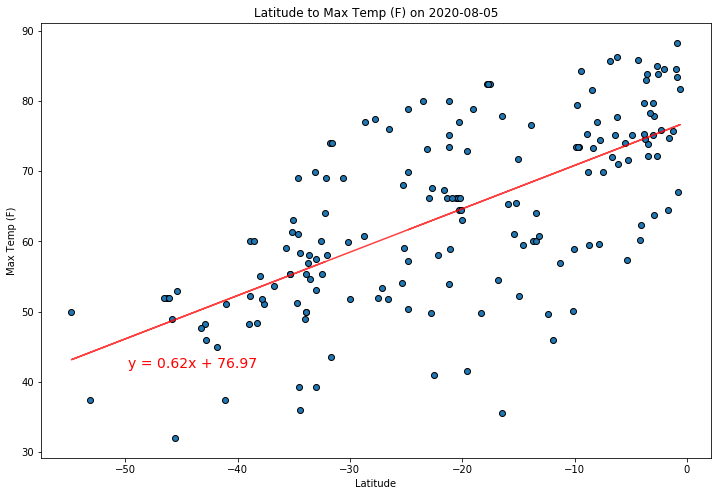

In [16]:
regression_plotter(southern, 'Latitude', 'Max Temp (F)')

Changes in max temperature by latitude in the southern hemisphere. We see a strong positive correlation with each successive increase in latitudinal value. Approaching 0 latitude trends towards a warmer temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 6.312634212297008e-05


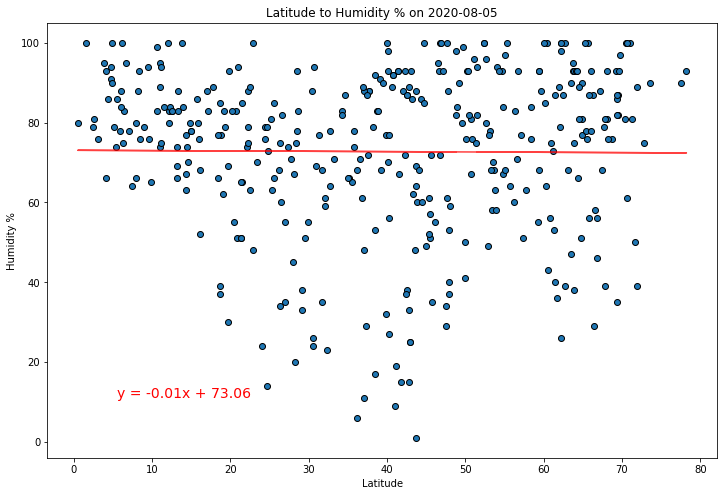

In [17]:
regression_plotter(northern, 'Latitude', 'Humidity %')

Changes in humidity saturation across latitudinal values in the northern hemisphere. Statistically speaking, latitude does not correlate to siginificant changes in humidity, but there is an observable cluster of lower humidity in the middle latitudes.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0012351128775077778


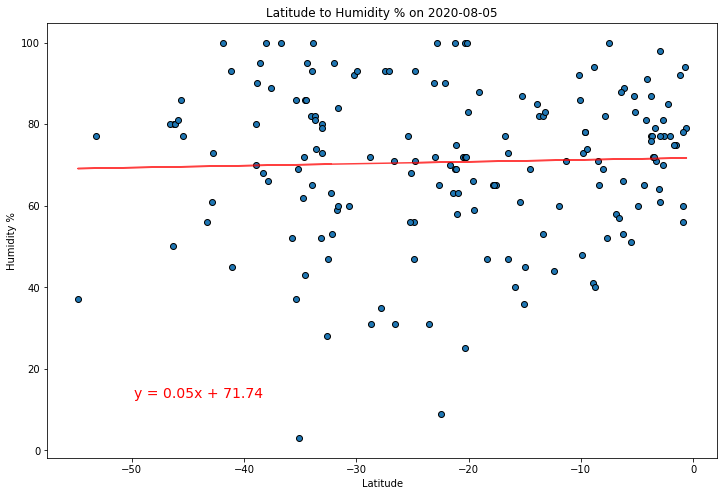

In [18]:
regression_plotter(southern, 'Latitude', 'Humidity %')

Changes in humidity saturation across latitudinal values in the southern hemisphere. Changes in latitude does show a weak negative correlation to changes in humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.00092102411552778


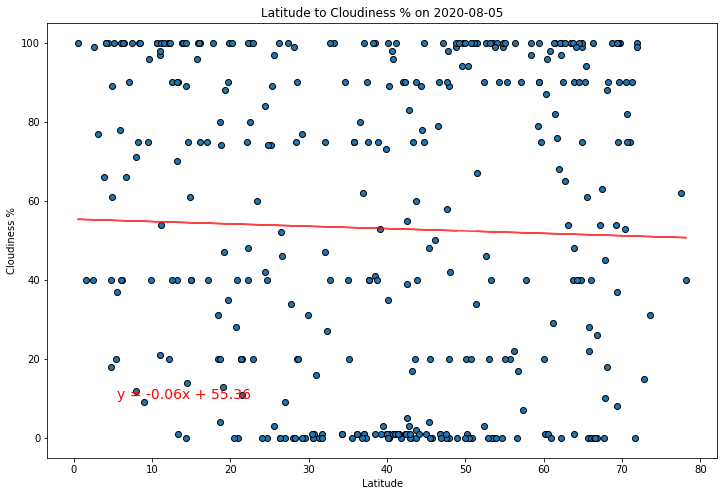

In [19]:
regression_plotter(northern, 'Latitude', 'Cloudiness %')

Changes in cloud cover across latitudinal values in the northern hemisphere. Statistically speaking, latitude does not correlate to siginificant changes in cloud cover, but there is an observable cluster of near-zero cloud cover in the middle latitudes, as well as some clustering of high cloud cover in the extreme latitudes.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 4.031351991391698e-05


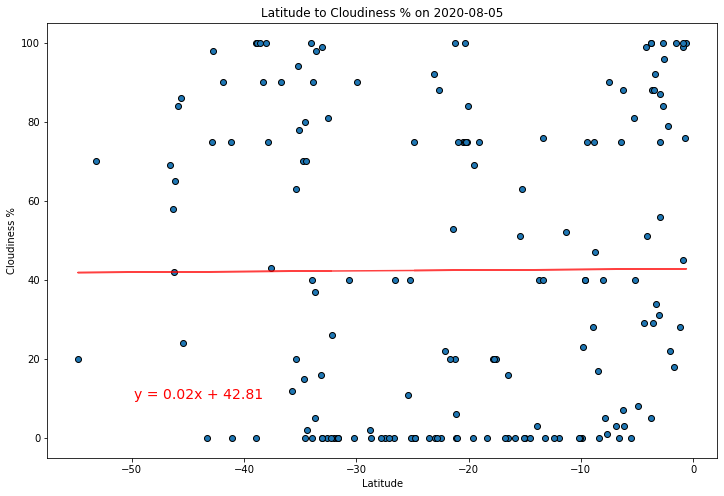

In [20]:
regression_plotter(southern, 'Latitude', 'Cloudiness %')

Changes in cloud cover across latitudinal values in the southern hemisphere. Changes in latitude show a weak negative correlation to changes in cloud cover, with a significant cluster of near-zero cloud cover in the higher latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0003338644739523083


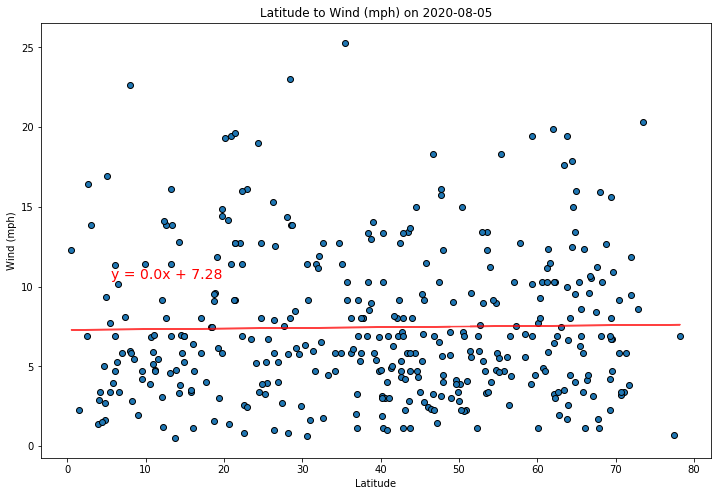

In [21]:
regression_plotter(northern, 'Latitude', 'Wind (mph)')

Changes in wind speed across latitudinal values in the northern hemisphere. There is a no significant correlation in the distribution.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.024008601025214474


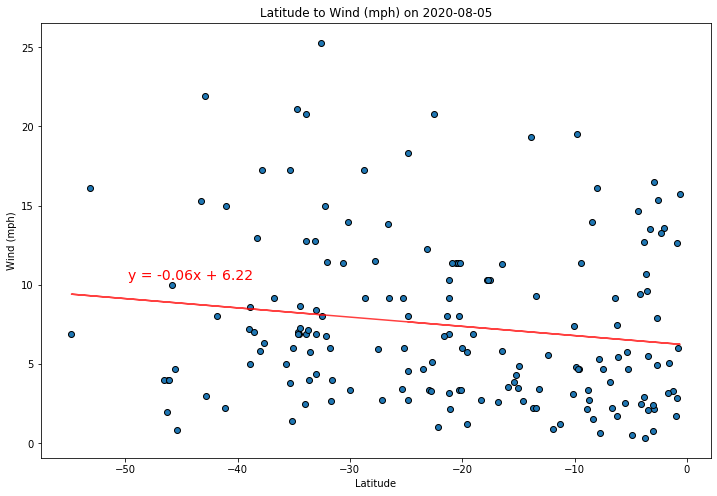

In [22]:
regression_plotter(southern, 'Latitude', 'Wind (mph)')

Changes in wind speed across latitudinal values in the southern hemisphere. There is a no significant correlation in the distribution.

# Findings Summary
------

- Classifying our regressive analyses by hemisphere is incredibly important. Due to the 0-center scale of latitudinal values, any regression analysis would be next to impossible across all values, as the results of regression on positive latitudinal values would cancel out the negative latitudinal values. This is important to remember for any dataset with a 0-center value.

- The strongest statistically describable correlations can be found in comparisons between temperature and latitude, but there also exists a not insignificant degree of clustering in comparisons between humidity and latitude. This demonstrates the importance of drawing conclusions from more than one type of analysis, as simple Pearson's r values won't show the wave-like shape variation in the humidity data.

- There is also visual clustering in the cloud cover data, but I would chalk this down to cloud cover data being in integer format. Without the continuous nature of non-integer datatypes, line clustering looks more significant than I think it actually is.